In [40]:
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [50]:
# load mp3 with librosa
audio_input, sample_rate = librosa.load('KLAX.mp3', sr=5000)

audio_input = torch.from_numpy(audio_input).unsqueeze(0)

# Convert stereo to mono if necessary
# if audio_input.ndim > 1:
#   audio_input = torch.mean(audio_input, dim=0, keepdim=True)

# Resample the audio to 16000 Hz if necessary
# if sample_rate != 16000:
#   resampler = torchaudio.transforms.Resample(input_sample_rate, 16000)
#   audio_input = resampler(audio_input)

print(audio_input.shape)

[src/libmpg123/layer3.c:INT123_do_layer3():1771] error: part2_3_length (1664) too large for available bit count (1560)


torch.Size([1, 7653334])


In [10]:
audio_input_np = audio_input.numpy()[0]
audio_input_np

array([ 2.8951321e-24,  2.6883370e-24, -6.6174449e-24, ...,
       -6.9016078e-04, -9.1243666e-03, -7.6083029e-03], dtype=float32)

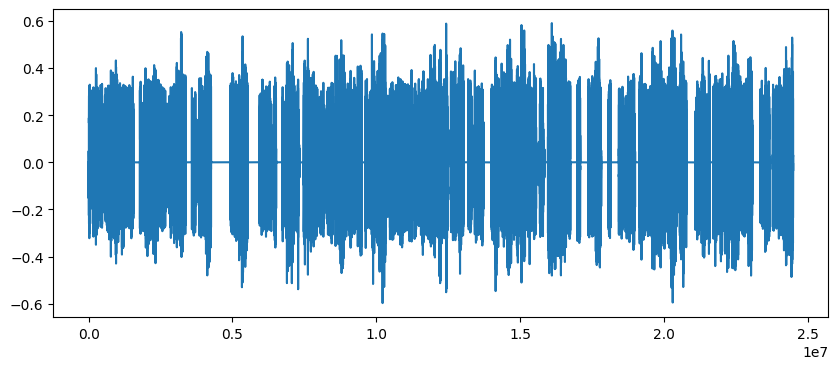

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(audio_input_np)

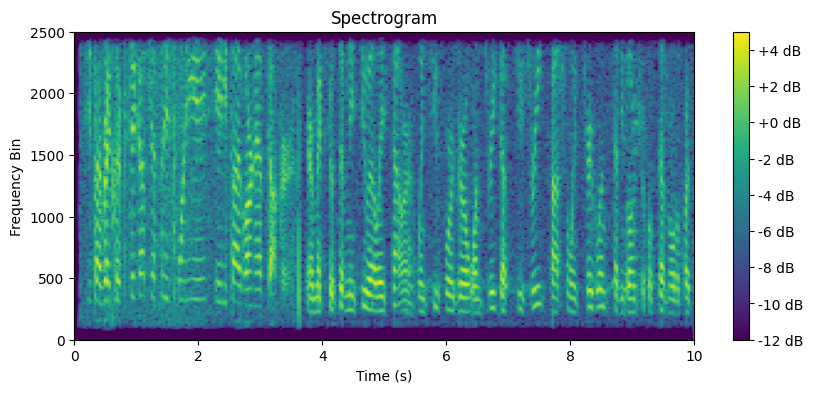

In [65]:
# Slice from 190 to 210 seconds
start = 72 * sample_rate
end = 82 * sample_rate
audio_input_np = audio_input[:, start:end]
# audio_input_np = audio_input

torchaudio.save('KLAX_slice.wav', audio_input_np, sample_rate)

# Create a spectrogram from the waveform
spectrogram = torchaudio.transforms.Spectrogram()(audio_input_np)

# Convert the spectrogram to numpy array for plotting
spectrogram_np = spectrogram.numpy()

# Get number of frames from the spectrogram shape
num_frames = spectrogram_np.shape[2]

# Get the time axis values
duration = audio_input_np.shape[1] / sample_rate
time_axis = np.linspace(0, duration, num_frames)

# Plot and save the spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(np.log(spectrogram_np[0, :, :]), aspect='auto', origin='lower',
            vmin=-12, vmax=5, extent=[time_axis.min(), time_axis.max(), 0, sample_rate/2])
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bin')
plt.colorbar(format="%+2.0f dB")